# Ising 2D 
## Simulaciones Montecarlo , Algoritmo de Metropolis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

###   Definimos los parámetros del sistema

In [68]:
L = 50  # Tamaño del sistema (LxL)
J = 1  # Energía de interacción entre espines
T = 1.7  # Temperatura
num_pasos = 10000

### Definición de funciones básicas

In [69]:
def calcular_energia(spins):
    energia = 0
    for i in range(L):
        for j in range(L):
            energia += -J * spins[i, j] * (spins[(i + 1) % L, j] +spins[(i - 1) % L, j]+ spins[i, (j + 1) % L]+spins[i, (j - 1) % L])
    return energia

def lista_aleatorios(L):
    lista = [0]*(L**2)
    for i in range(L**2):
        lista[i] = random.randint(0,L**2-1)
    return lista

def site_assign(N_i,L):
    i = int(N_i/L)
    j= N_i%L
    return i,j

def metropolis(spins, temperatura,n):
    i, j = site_assign(n,L)
    s = spins[i, j]
    suma_vecinos = (spins[(i + 1) % L, j] + spins[(i - 1) % L, j] +
                                           spins[i, (j + 1) % L] + spins[i, (j - 1) % L])
    delta_energia = 2 * J * s * suma_vecinos
    if delta_energia < 0:  
        spins[i, j] *= -1
    elif random.random() < np.exp(-delta_energia / temperatura):
        spins[i, j] *= -1
    return spins

def mag(T):
    if T > 2/np.log(1+np.sqrt(2)):
        return(0)
    else:
        return((1-(np.sinh(2/T))**(-4))**(1/8))
    
def calcular_magnetizacion(spins):
    return np.sum(spins) / (L * L)

### Condiciones iniciales 

In [70]:
#spins = np.random.choice([-1, 1], size=(L, L))
spins = np.ones((L, L))
magnetizacion = []
energias = []

In [71]:
for paso in range(num_pasos):
    N = lista_aleatorios(L)
    energia = calcular_energia(spins)
    magnetizacion1 = calcular_magnetizacion(spins)
    for k in range(len(N)):
        metropolis(spins,T,N[k])
    energias.append(energia)
    magnetizacion.append(magnetizacion1)

####  Graficadores

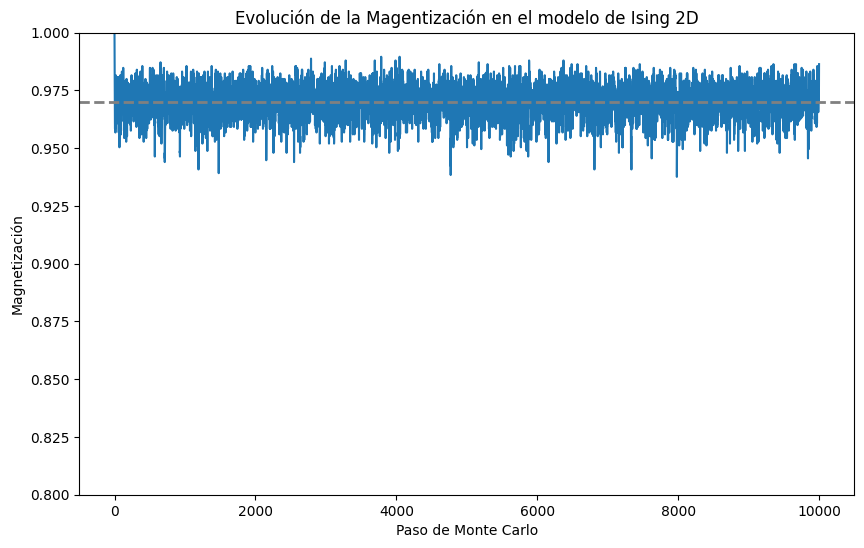

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(magnetizacion,'-',markersize=1)
plt.xlabel('Paso de Monte Carlo')
plt.ylabel('Magnetización')
plt.ylim([0.8,1.0])
plt.axhline(mag(T), color='grey',linestyle='--',linewidth=2)
plt.title('Evolución de la Magentización en el modelo de Ising 2D')
plt.show()

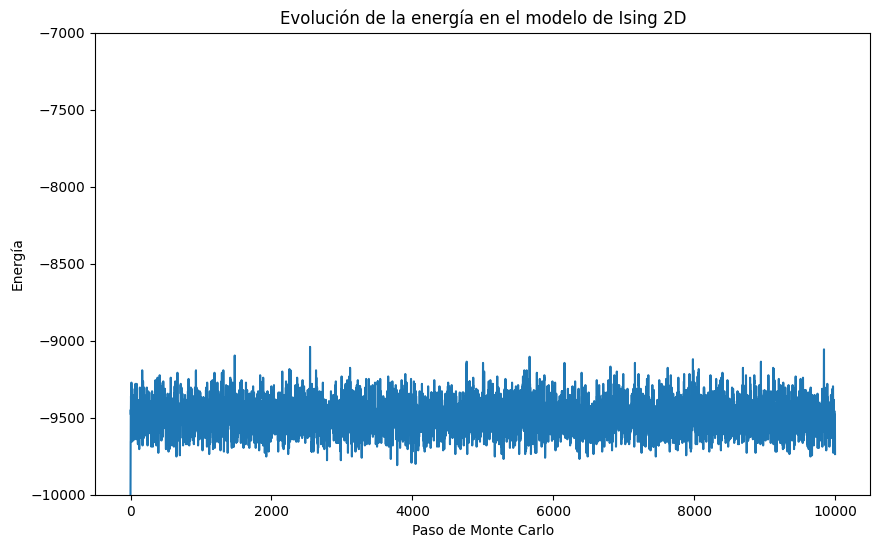

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(energias)
plt.xlabel('Paso de Monte Carlo')
plt.ylabel('Energía')
plt.ylim([-10000,-7000])
plt.title('Evolución de la energía en el modelo de Ising 2D')
plt.show()